<font color = green>

##  Brest Cancer Dataset

</font>


In [4]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import os

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

<font color = black>

##  Reading Brest Cancer Dataset;

</font>

In [39]:
# https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y= True)
print ('X.shape= ', X.shape)
print ('y.shape= ', y.shape)

X.shape=  (569, 30)
y.shape=  (569,)


In [61]:
X_train, X_test, y_train, y_test  =  train_test_split(X, y, random_state= 0)

<font color = black>

##  Normalization

</font>

In [62]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
clf = MLPClassifier(
    solver= 'lbfgs',
    hidden_layer_sizes= (100,100),
    random_state = 0
).fit(X_train,y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train,y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test,y_test)))

train accuracy= 95.305%
test accuracy= 94.406%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<font color = green>

##  Handwritten Digits

</font>

<font color = black>

###  Load the data 

</font>

In [43]:
from scipy.io import loadmat
path = os.path.join(os.getcwd(), 'data')    
fn=  os.path.join(path , 'digits.mat')
mat= loadmat(fn)
X = mat['X']
y = mat['y'].ravel()
y = y%10 # make 10 to 0 
X_train, X_test, y_train, y_test  =  train_test_split(X, y, random_state= 0)
print ('X_train.shape=', X_train.shape)
print ('X_test.shape=', X_test.shape)
print ('y_train.shape=', y_train.shape)
print ('y_test.shape=', y_test.shape)

X_train.shape= (3750, 400)
X_test.shape= (1250, 400)
y_train.shape= (3750,)
y_test.shape= (1250,)


<font color = black>

###  Vizualize data

</font>

In [44]:
def draw_pixels_img(x, ax = None, title=None):
    '''
    :param x: ndarray - row
    '''

    img_width = int(np.sqrt(x.shape[0]))
    img_height = x.shape[0]/img_width
    try:
        data = x.reshape(img_width, -1).T
    except:
        SystemExit('Cannot compute the size of the picture')
    if ax:
        plt.sca(ax)
    else:
        plt.figure(figsize=(2, 2))
    plt.imshow(data, cmap='Greys', interpolation='nearest')
    plt.axis('off')
    if not title is None:
        plt.title(title)

<ipython-input-45-5162476a53a7>:7: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=5)


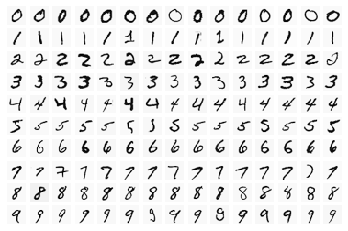

In [45]:
plt.figure()
for i in range (10): 
    for j in range (15):
        index = 500*i+j           
        ax = plt.subplot(10,15,i*15+j+1) 
        draw_pixels_img(X[index], ax)
plt.tight_layout(h_pad=5) 

<font color = black>

###  Normalization

</font>

In [46]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<font color = black>

###  Training

</font>

In [47]:
clf = MLPClassifier(
#     solver= 'lbfgs',
#     hidden_layer_sizes= (100,100),
    random_state = 10,
    alpha = 10
).fit(X_train_scaled,y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled,y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled,y_test)))

train accuracy= 93.760%
test accuracy= 91.280%


<font color = black>

###  Predicting

</font>

<ipython-input-48-8379a561ff51>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(n_rows,n_cols,index+1)


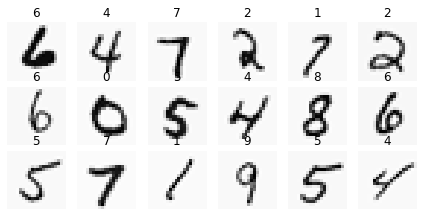

In [48]:
def draw_digits_samples(X,n_rows= 10, n_cols = 10, y=None):
    indices = np.random.randint(0, len(X), n_rows*n_cols)
    for i in range (n_rows): 
        for j in range (n_cols):
            index = n_rows*i+j           
            ax = plt.subplot(n_rows,n_cols,index+1) 
            if y is None: 
                draw_pixels_img(X[indices[index]], ax)
            else:
                draw_pixels_img(X[indices[index]], ax, title=y[indices[index]])
    plt.tight_layout(h_pad=-1) 

plt.figure()
# draw_digits_samples(X_train,X_train_scaled, n_rows= 4, n_cols = 6, clf = clf)
predicted= clf.predict(X_test_scaled)
draw_digits_samples(X_test, n_rows= 4, n_cols = 6, y = predicted)

<font color = green>

##  Signs recognition

</font>

In [6]:
# signs data set (fingers)
import h5py
def load_dataset():
    path = os.path.join(os.getcwd(), 'data')    
    fn =  os.path.join(path , 'train_signs.h5')
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels

    fn =  os.path.join(path , 'test_signs.h5')
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    
    return X_train, y_train, X_test, y_test, classes


In [7]:
X_train, y_train, X_test, y_test, classes = load_dataset()
y_train = y_train.ravel()
y_test = y_test.ravel()
print ('X_train.shape=', X_train.shape)
print ('X_test.shape=', X_test.shape)
print ('y_train.shape=', y_train.shape)
print ('y_test.shape=', y_test.shape)

X_train.shape= (1080, 64, 64, 3)
X_test.shape= (120, 64, 64, 3)
y_train.shape= (1080,)
y_test.shape= (120,)


In [8]:
def display_samples_in_grid(X, n_rows, n_cols= None, y = None ):
    if n_cols is None: 
        n_cols= n_rows
    indices = np.random.randint(0, len(X),n_rows*n_cols)
    for i in range (n_rows): 
        for j in range (n_cols):
            index = n_rows*i+j           
            ax = plt.subplot(n_rows,n_cols,index+1) 
            plt.imshow(X[indices[index]])
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')
    plt.tight_layout(h_pad=1)

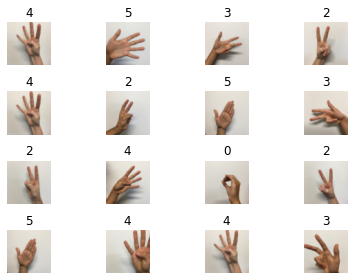

In [9]:
plt.figure()

display_samples_in_grid(X_train, n_rows=4, y= y_train)

In [10]:
plt.gcf().canvas.set_window_title('Train set')

<Figure size 432x288 with 0 Axes>

In [11]:
# t=np.shape(X_train)
# X_train=X_train.reshape((t[0],t[1]*t[2]*t[3]))
# t=np.shape(X_test)
# X_test=X_test.reshape((t[0],t[1]*t[2]*t[3]))
# print(np.shape(X_tr))
# print(np.shape(X_tes))

<font color = black>

###  Normalization

</font>

In [12]:
scaler = StandardScaler()
t=np.shape(X_train)
X_train_scaled = scaler.fit_transform(X_train.reshape((t[0],t[1]*t[2]*t[3])))
t=np.shape(X_test)
X_test_scaled = scaler.transform(X_test.reshape((t[0],t[1]*t[2]*t[3])))
print ("number of training examples = " + str(X_train_scaled.shape[1]))
print ("number of test examples = " + str(X_test_scaled.shape[1]))
print ("X_train_scaled shape: " + str(X_train_scaled.shape))

print ("X_test_scaled shape: " + str(X_test_scaled.shape))

number of training examples = 12288
number of test examples = 12288
X_train_scaled shape: (1080, 12288)
X_test_scaled shape: (120, 12288)


### Expected result 

```
number of training examples = 12288
number of test examples = 12288
X_train_scaled shape: (1080, 12288)
X_test_scaled shape: (120, 12288)
```

<font color = black>

###  Training

</font>

In [13]:
clf = MLPClassifier(
    solver= 'lbfgs',
    hidden_layer_sizes= (100),
    random_state = 10,
    alpha = 10
).fit(X_train_scaled,y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled,y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled,y_test)))

train accuracy= 100.000%
test accuracy= 95.000%


### Expected result 

```
train accuracy= 100.000%
test accuracy= 90.000%
```

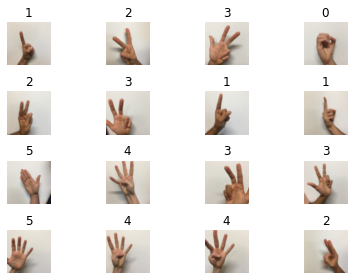

In [14]:
plt.figure()

predicted = clf.predict(X_test_scaled)

display_samples_in_grid(X_test, n_rows=4, y= predicted)


In [15]:
plt.gcf().canvas.set_window_title('Test set prediction')

<Figure size 432x288 with 0 Axes>

### Compare with SVM 

In [16]:
#------SVM linear kernel
from sklearn.svm import LinearSVC
lin_svm = LinearSVC(C=1, max_iter=10000).fit(X_train_scaled, y_train)
print("=====Liner SVC=====")
print(f'train accuracy = {lin_svm.score(X_train_scaled, y_train):.3%}')
print(f'test accuracy = {lin_svm.score(X_test_scaled, y_test):.3%}')
print  ('b = {}\nw = {}'.format(lin_svm.intercept_, lin_svm.coef_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


=====Liner SVC=====
train accuracy = 100.000%
test accuracy = 84.167%
b = [-0.48396884 -0.69681521 -0.6801846  -0.52455058 -0.62151393 -0.58525584]
w = [[ 0.00105908 -0.00374461  0.00850074 ...  0.01900389  0.01154599
   0.01054139]
 [ 0.0316027   0.01135877 -0.00749672 ... -0.0111006  -0.00817882
  -0.00405427]
 [-0.00717721  0.00265683 -0.0002989  ... -0.0011473   0.00044964
  -0.00529518]
 [-0.00462334  0.00081599  0.00657068 ...  0.00527962 -0.00347492
  -0.00955152]
 [-0.01522396 -0.0002754  -0.00158022 ... -0.00368677  0.00570765
   0.0119319 ]
 [-0.00714245 -0.00776975 -0.00995273 ... -0.00637403 -0.00433464
   0.00128181]]


In [ ]:
# #------SVC RBF Kernel
# from sklearn.svm import SVC

# rbf_svm = SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train_scaled, y_train)
# print("=====RBF SVC=====")
# print(f'train accuracy = {rbf_svm.score(X_train_scaled, y_train):.3%}')
# print(f'test accuracy = {rbf_svm.score(X_test_scaled, y_test):.3%}')

In [1]:
# #----- SVC Polynomial Kernel
# from sklearn.svm import SVC
# poly_svm = SVC(C=5000, kernel='poly', degree=3).fit(X_train_iris_scaled, y_train_iris)
# print("=====SVC Polynomial Kernel=====")
# print(f'train accuracy = {poly_svm.score(X_train_scaled, y_train):.3%}')
# print(f'test accuracy = {poly_svm.score(X_test_scaled, y_test):.3%}')